In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dataframe = pd.read_csv("abalone.csv", sep=",")
dataframe.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
def generate_dataset():
    x_batch=dataframe["Shell weight"]
    y_batch=dataframe["Rings"]
    return x_batch, y_batch

In [4]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None, ), name='x')
    y = tf.placeholder(tf.float32, shape=(None, ), name='y')

    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name='W')
        b = tf.Variable(np.random.normal(), name='b')
        y_pred = tf.add(tf.multiply(w, x), b)

        loss = tf.reduce_mean(tf.square(y_pred - y))

        return x, y, y_pred, loss

In [5]:
def run():

    x_batch, y_batch = generate_dataset()

    x, y, y_pred, loss = linear_regression()

    optimizer = tf.train.GradientDescentOptimizer(0.1)

    train_op = optimizer.minimize(loss)


    with tf.Session() as session:
        session.run(tf.global_variables_initializer())


        feed_dict = {x: x_batch, y: y_batch}


        for i in range(30):

            _ = session.run(train_op, feed_dict)
            print(i, "loss:", loss.eval(feed_dict))

        print('Predicting')

        y_pred_batch = session.run(y_pred, {x : x_batch})



    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch, color='red')

    plt.xlim(0, 1)
    plt.ylim(0, 30)

    plt.savefig('plot.png')





(0, 'loss:', 97.738)
(1, 'loss:', 64.60014)
(2, 'loss:', 43.9929)
(3, 'loss:', 31.17397)
(4, 'loss:', 23.195889)
(5, 'loss:', 18.226696)
(6, 'loss:', 15.127703)
(7, 'loss:', 13.191213)
(8, 'loss:', 11.977337)
(9, 'loss:', 11.212666)
(10, 'loss:', 10.72727)
(11, 'loss:', 10.415539)
(12, 'loss:', 10.211809)
(13, 'loss:', 10.075289)
(14, 'loss:', 9.980612)
(15, 'loss:', 9.912009)
(16, 'loss:', 9.859686)
(17, 'loss:', 9.817553)
(18, 'loss:', 9.781825)
(19, 'loss:', 9.750151)
(20, 'loss:', 9.721057)
(21, 'loss:', 9.693643)
(22, 'loss:', 9.6673355)
(23, 'loss:', 9.64179)
(24, 'loss:', 9.616777)
(25, 'loss:', 9.592174)
(26, 'loss:', 9.567879)
(27, 'loss:', 9.543851)
(28, 'loss:', 9.520046)
(29, 'loss:', 9.496453)
Predicting


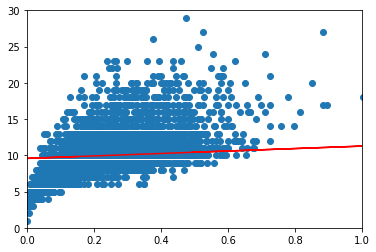

In [6]:
if __name__ == "__main__":

    run()